In [1]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загружаем изображение
img = cv2.imread('src/image.jpg', cv2.IMREAD_GRAYSCALE)

# приводим изображение к размеру 512х512
img = cv2.resize(img, (512, 512))

In [40]:
print(cH)

(array([[   0.53425592,    0.5303271 ,    0.49620697, ...,    0.41155974,
           0.33895041,    0.58124068],
       [  -4.19677519,   -4.18715715,   -4.09238842, ...,   -5.64453568,
          -4.5121458 ,   -6.80136162],
       [  -0.20452583,   -0.17684847,   -0.89191168, ...,    3.10324846,
           0.84792632,    8.37825737],
       ...,
       [ -94.0358508 ,  -95.19137876,  -45.27011904, ...,  -36.27430648,
         -68.81623517,   46.6880043 ],
       [ -14.64416279,  -17.22439759,   87.99498183, ...,    2.12719466,
           5.83139188,  -22.76815888],
       [   3.30798755,    6.13500128, -111.14107771, ...,   -5.31693956,
          -9.45079658,   -2.63428054]]), array([[ 1.42108547e-14, -3.99318915e-01,  4.75438254e+00, ...,
        -4.48772497e+00,  3.87585199e+00,  9.85103501e+00],
       [ 2.84217094e-14, -3.76698846e-01,  5.13936279e+00, ...,
        -4.58712963e+00,  4.27185572e+00,  9.37911602e+00],
       [ 1.42108547e-14, -2.20997318e-01,  5.80490831e+00, ...,
 

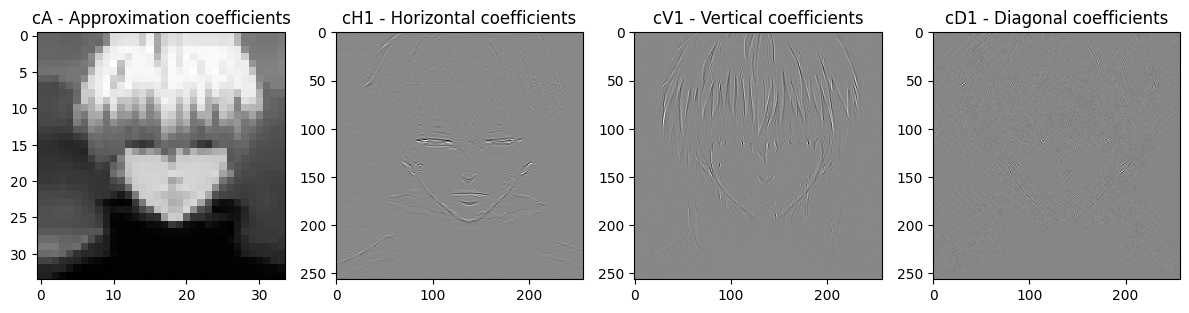

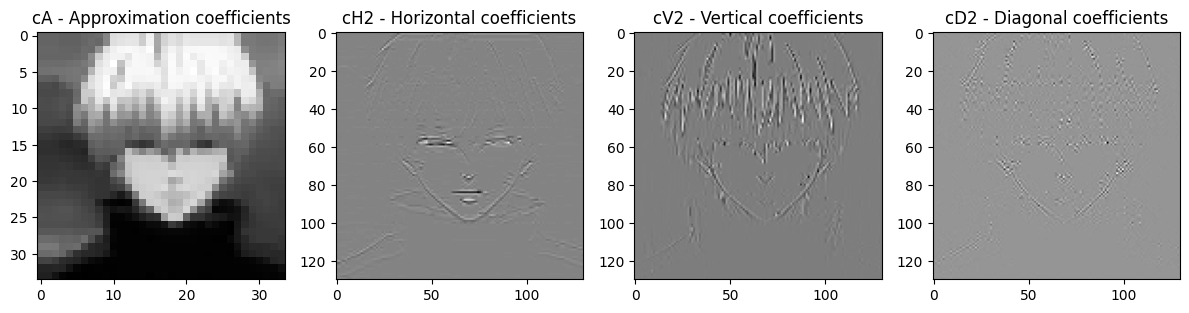

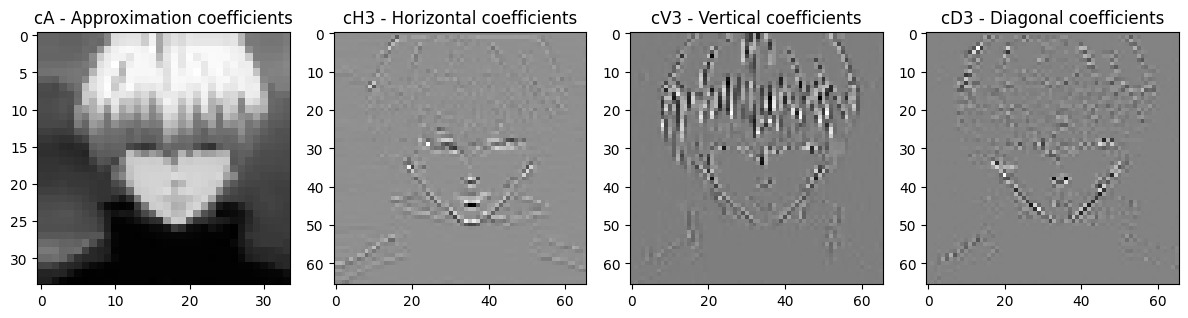

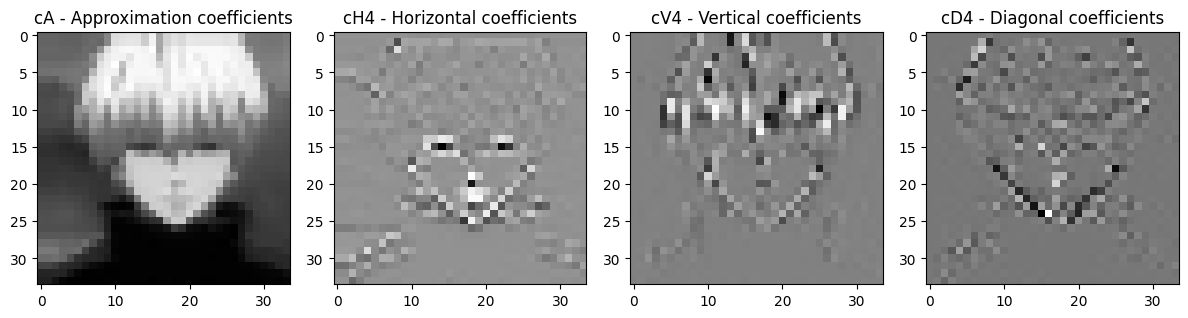

In [129]:
# проводим 4 уровня вейвлет-разложения изображения
coeffs = pywt.wavedec2(img, 'db2', level=4)

# выделяем границы объекта
cA, (cH4, cV4, cD4), (cH3, cV3, cD3), (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs
plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title('cA - Approximation coefficients')
plt.subplot(142)
plt.imshow(cH1, cmap=plt.cm.gray)
plt.title('cH1 - Horizontal coefficients')
plt.subplot(143)
plt.imshow(cV1, cmap=plt.cm.gray)
plt.title('cV1 - Vertical coefficients')
plt.subplot(144)
plt.imshow(cD1, cmap=plt.cm.gray)
plt.title('cD1 - Diagonal coefficients')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title('cA - Approximation coefficients')
plt.subplot(142)
plt.imshow(cH2, cmap=plt.cm.gray)
plt.title('cH2 - Horizontal coefficients')
plt.subplot(143)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2 - Vertical coefficients')
plt.subplot(144)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2 - Diagonal coefficients')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title('cA - Approximation coefficients')
plt.subplot(142)
plt.imshow(cH3, cmap=plt.cm.gray)
plt.title('cH3 - Horizontal coefficients')
plt.subplot(143)
plt.imshow(cV3, cmap=plt.cm.gray)
plt.title('cV3 - Vertical coefficients')
plt.subplot(144)
plt.imshow(cD3, cmap=plt.cm.gray)
plt.title('cD3 - Diagonal coefficients')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title('cA - Approximation coefficients')
plt.subplot(142)
plt.imshow(cH4, cmap=plt.cm.gray)
plt.title('cH4 - Horizontal coefficients')
plt.subplot(143)
plt.imshow(cV4, cmap=plt.cm.gray)
plt.title('cV4 - Vertical coefficients')
plt.subplot(144)
plt.imshow(cD4, cmap=plt.cm.gray)
plt.title('cD4 - Diagonal coefficients')
plt.tight_layout()
plt.show()

In [112]:
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

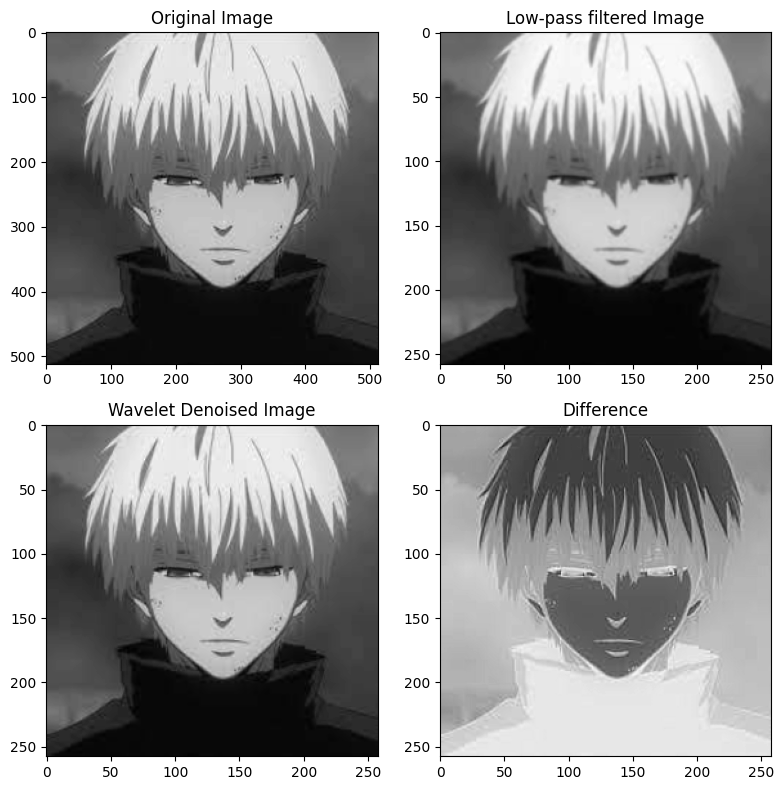

In [131]:
# удаляем высокочастотные составляющие и восстанавливаем изображение
coeffs_new_arr = [coeffs[0]]
for i in range(len(coeffs[1:]) - 1):
    coeffs_new_arr.append((coeffs[i + 1][0], coeffs[i + 1][1], coeffs[i + 1][2]))
    
img_denoised = pywt.waverec2(coeffs_new_arr, 'db2')

# сравниваем результаты с классической низкочастотной фильтрацией изображения
kernel = np.ones((5,5),np.float32)/25
img_filtered = cv2.filter2D(img,-1,kernel)
img_filtered_resized = cv2.resize(img_filtered, (img_denoised.shape[1], img_denoised.shape[0]), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.subplot(222)
plt.imshow(img_filtered_resized, cmap=plt.cm.gray)
plt.title('Low-pass filtered Image')
plt.subplot(223)
plt.imshow(img_denoised, cmap=plt.cm.gray)
plt.title('Wavelet Denoised Image')
plt.subplot(224)
plt.imshow(img_filtered_resized - img_denoised, cmap=plt.cm.gray)
plt.title('Difference')
plt.tight_layout()
plt.show()

In [71]:
coeffs[4][0]

array([[ 1.00485917e-14,  1.00485917e-14,  1.00485917e-14, ...,
         1.00485917e-14,  9.03889972e-15, -5.02429587e-15],
       [ 1.00485917e-14,  1.00485917e-14,  1.00485917e-14, ...,
        -1.54006351e-01,  6.25000000e-02, -5.02429587e-15],
       [ 1.00485917e-14,  1.00485917e-14,  1.00485917e-14, ...,
         9.15063509e-02,  1.67468245e-02, -6.83012702e-01],
       ...,
       [ 2.04903811e+00,  1.92403811e+00,  2.09479128e+00, ...,
         1.88411095e-15,  1.88411095e-15,  1.88411095e-15],
       [-3.08012702e-01, -4.95512702e-01, -8.82772228e-01, ...,
         1.88411095e-15,  1.88411095e-15,  1.88411095e-15],
       [-8.66025404e-01, -8.66025404e-01, -7.86778579e-01, ...,
         1.88411095e-15,  1.88411095e-15,  1.88411095e-15]])

In [65]:
len(coeffs[1:])

4